### 피쳐 추출 ==> 주성분(PCA)
- 데이터의 피쳐(특성)들에서 주요 특성을 추출해내는 것

In [2]:
# 모듈 로딩
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [11]:
irisDate = load_iris()
data = irisDate.data[:,:2]

In [15]:
irisDate = load_iris()
columns = irisDate.feature_names[:2]
irisDF = pd.DataFrame(data, columns=columns)
irisDF['target'] = irisDate.target
irisDF

,sepal length (cm),sepal width (cm),target
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [ ]:
plt.scatter()

In [53]:
irisDate[irisDF['target']==1]['sepal_width (cm)']

TypeError: unhashable type: 'Series'

In [51]:
irisDF[irisDF['target']==0]['sepal length (cm)']

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal length (cm), dtype: float64

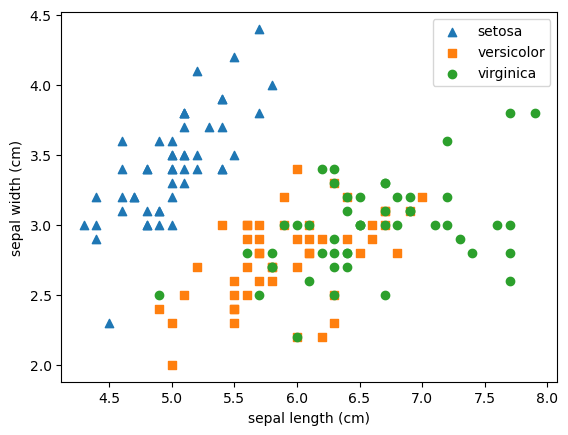

In [80]:
#데이터 분포
markers = ['^','s','o']
for i, marker in enumerate(markers):
    X_axis_data = irisDF[irisDF['target']==i]['sepal length (cm)']
    y_axis_data = irisDF[irisDF['target']==i]['sepal width (cm)']
    plt.scatter(X_axis_data, y_axis_data, marker = marker, label = irisDate.target_names[i])
    
plt.legend()
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.show()

### [주성분 추출]
- (1) 스케일링
- (2) 주성분 추출

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [25]:
irisDF.iloc[:,:-1]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [29]:
ss = StandardScaler()
scaled_data = ss.fit_transform(irisDF.iloc[:,:-1])


In [46]:
pca = PCA(n_components=2)
pca.fit_transform(scaled_data)

array([[-1.35742265e+00,  8.36671241e-02],
       [-7.14911424e-01, -9.01558594e-01],
       [-1.21181606e+00, -7.47368451e-01],
       [-1.13472099e+00, -9.95820768e-01],
       [-1.60587497e+00,  1.60762196e-01],
       [-1.75148156e+00,  9.91797770e-01],
       [-1.62304207e+00, -5.07499685e-01],
       [-1.28032758e+00, -1.64785193e-01],
       [-9.80530844e-01, -1.49272540e+00],
       [-8.77685119e-01, -7.38784899e-01],
       [-1.42593417e+00,  6.66250382e-01],
       [-1.45168482e+00, -3.36142439e-01],
       [-8.00590047e-01, -9.87237217e-01],
       [-1.22898316e+00, -1.41563033e+00],
       [-1.57154076e+00,  1.49728596e+00],
       [-2.30831416e+00,  2.06270211e+00],
       [-1.75148156e+00,  9.91797770e-01],
       [-1.35742265e+00,  8.36671241e-02],
       [-1.33167200e+00,  1.08605994e+00],
       [-1.84574373e+00,  5.71988207e-01],
       [-9.37613088e-01,  1.77929298e-01],
       [-1.68297004e+00,  4.09214513e-01],
       [-1.94858946e+00, -1.81952296e-01],
       [-1.

In [47]:
pca.components_

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [48]:
pca.explained_variance_ratio_

array([0.55878489, 0.44121511])

In [71]:
irisDF4= pd.DataFrame(irisDate.data, columns = irisDate.feature_names)
irisDF4['target'] = irisDate.target

In [76]:
#피쳐 4개에서 2개만 추출

In [83]:
ss = StandardScaler()
scaled_data = ss.fit_transform(irisDF4.iloc[:,:-1])
pca = PCA(n_components=3)
pca.fit_transform(scaled_data)
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

In [92]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
pca_data_df = pd.DataFrame(pca_data, columns=['pca_compenet1', 'pca_compenet2'])
pca_data_df['target'] = irisDate.target
pca_data_df

,pca_compenet1,pca_compenet2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


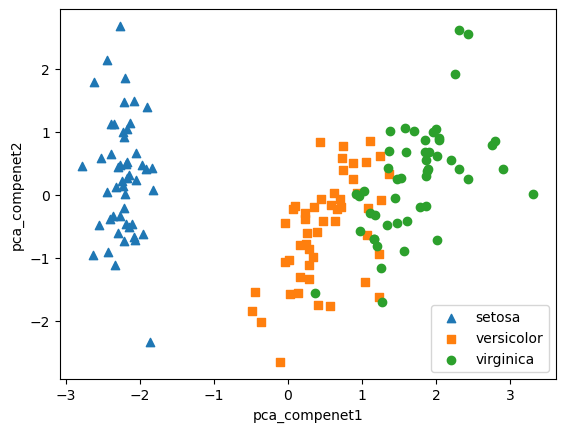

In [94]:
#데이터 분포
markers = ['^','s','o']
for i, marker in enumerate(markers):
    X_axis_data = pca_data_df[pca_data_df['target']==i]['pca_compenet1']
    y_axis_data = pca_data_df[pca_data_df['target']==i]['pca_compenet2']
    plt.scatter(X_axis_data, y_axis_data, marker = marker, label = irisDate.target_names[i])
    
plt.legend()
plt.xlabel('pca_compenet1')
plt.ylabel('pca_compenet2')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state= 123)
...

### 신용카드 연체 예측 모델
- 6개월 신용카드 실적과 대금 납부 지연 일자 데이터를 기반으로 다음달 연체 여부 예측
- 사용자 정보 포함
- 타겟변수(반응변수)와 관련 있는 피쳐(속성)부터 찾기

In [110]:
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



In [111]:
Default_of_credit = pd.read_excel('default of credit card clients.xls', header= 1,usecols= 'B:Y')

In [112]:
Default_of_credit
Default_of_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [113]:
corr = Default_of_credit.corr()
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


### 피쳐 선택
- 타겟과 피쳐 관계 : 상관계수가 높은 피쳐 선택
- 피쳐와 피쳐 관계 : 상관계수가 높은 피쳐 제거

<AxesSubplot: >

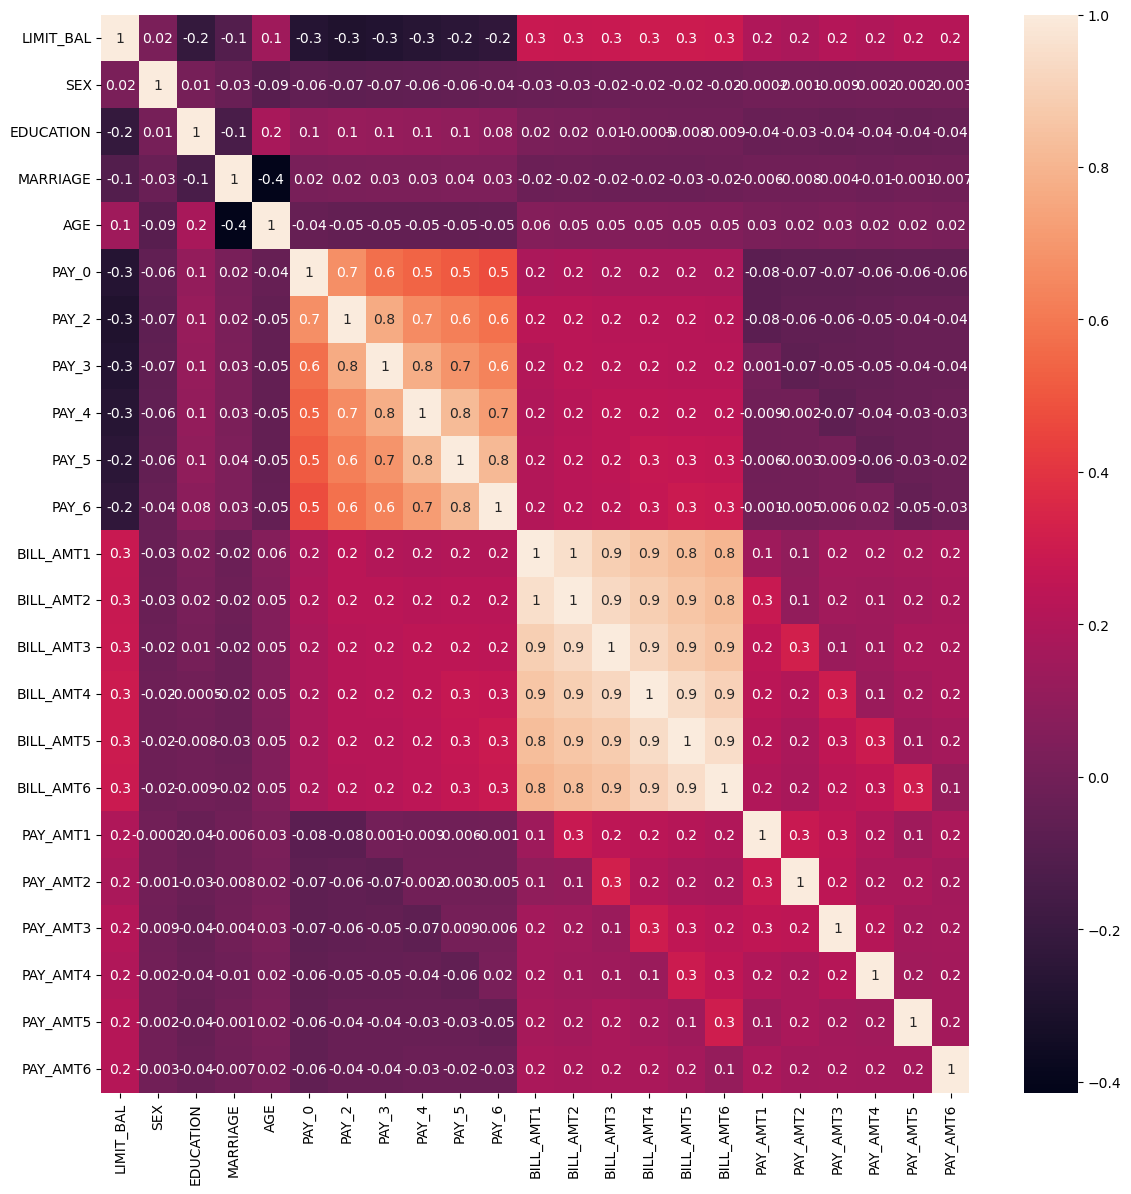

In [118]:
corr = Default_of_credit.corr().iloc[:-1,:-1]
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot = True, fmt = '.1g')

In [138]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

col_vil1 = ['BILL_AMT'+str(i) for i in range(1,7)]
ss = StandardScaler()
df_col_scaled = ss.fit_transform(Default_of_credit[col_vil1])
df_col_scaled
pca = PCA(n_components=2)
pca_scaled = pca.fit_transform(df_col_scaled)
print(pca.explained_variance_ratio_)#95%이상 설명
pca_data_df = pd.DataFrame(pca_scaled, columns=['pca_BILL_compenet1', 'pca_BILL_compenet2'])
pca_data_df

[0.90555253 0.0509867 ]


,pca_BILL_compenet1,pca_BILL_compenet2
0,-1.611148,0.012479
1,-1.547595,-0.062344
2,-1.035874,0.011256
3,-0.250712,0.174374
4,-0.968951,-0.213032
...,...,...
29995,2.610194,2.419078
29996,-1.521009,-0.066271
29997,-1.195519,-0.359507
29998,-0.008293,-0.049958


In [ ]:
import 